In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [8]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [9]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

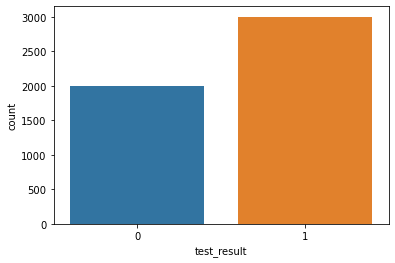

In [15]:
sns.countplot(data=df, x='test_result');

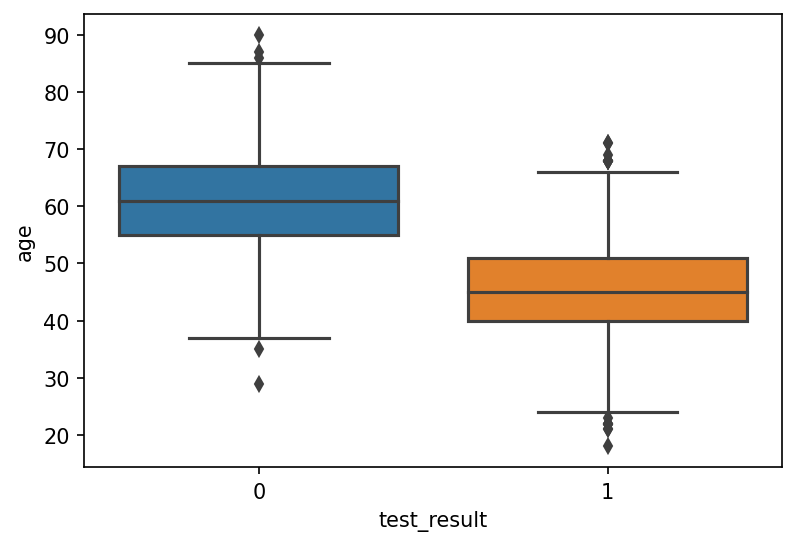

In [21]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='age');

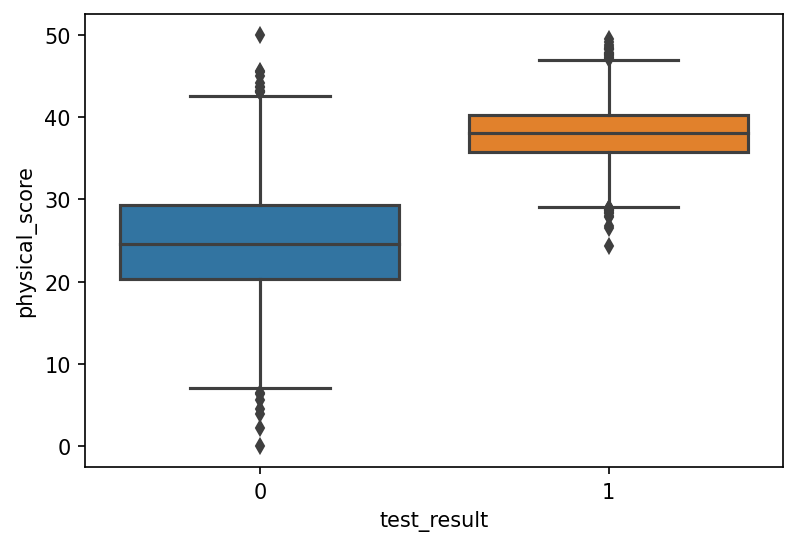

In [23]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='physical_score');

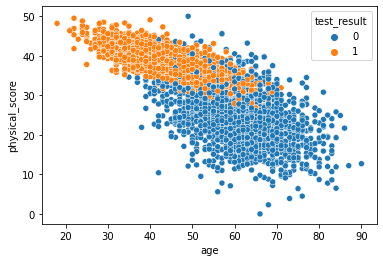

In [27]:
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result');

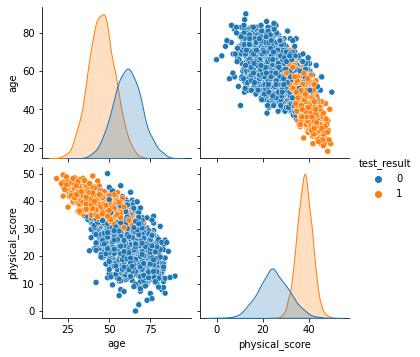

In [28]:
sns.pairplot(df,hue='test_result')

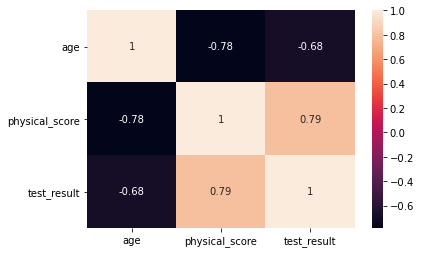

In [31]:
sns.heatmap(df.corr(),annot=True);

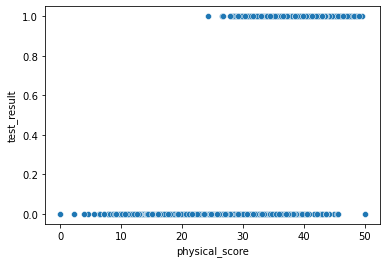

In [34]:
sns.scatterplot(x='physical_score', y='test_result',data=df);

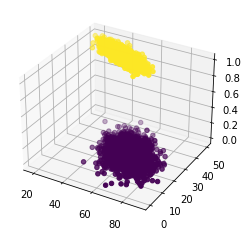

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'],c=df['test_result']);

In [46]:
import plotly.express as px
fig = px.scatter_3d(x='age',y='physical_score', z='test_result',data_frame=df,color='test_result')
fig.show()

In [47]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [52]:
log_model.coef_
# First coeficient refers to age and second refers to physical score
# We can observe that as the age increase the odds of the test result be 1 decreases because of the negative sign
# In other words, as the people get older they tend to not pass in the hearing test
# And we can expect that the physical score increases the odds increase of passing in the hearing test
# And the value show that physical score is a stronger predictor than age because of the difference between the values

array([[-0.94953524,  3.45991194]])

In [53]:
y_pred = log_model.predict(scaled_X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ImportError: cannot import name 'plot_cofusion_matrix' from 'sklearn.metrics' (C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [56]:
y_pred = log_model.predict(scaled_X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.93

In [60]:
confusion_matrix(y_test,y_pred)
# At the first row, the first value is the true positives and the second is the false negatives
# And at the second row the first value is the false positives and the second is the true negatives

array([[172,  21],
       [ 14, 293]], dtype=int64)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



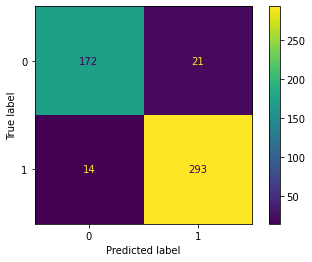

In [89]:
from sklearn.metrics import plot_confusion_matrix,ConfusionMatrixDisplay
plot_confusion_matrix(log_model,scaled_X_test,y_test);
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=log_model.classes_)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [78]:
from sklearn.metrics import precision_score, recall_score

In [79]:
precision_score(y_test,y_pred)

0.9331210191082803

In [80]:
recall_score(y_test,y_pred)

0.9543973941368078

In [81]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



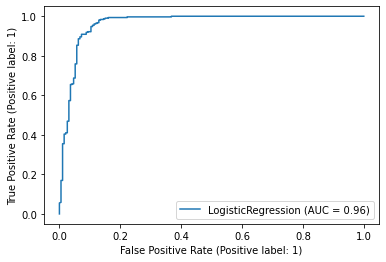

In [82]:
plot_roc_curve(log_model, scaled_X_test,y_test)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.



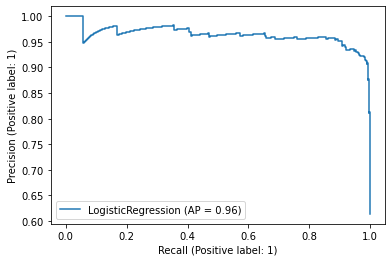

In [91]:
plot_precision_recall_curve(log_model, scaled_X_test,y_test)

In [92]:
log_model.predict_proba(scaled_X_test)[0]
# Here we can see that there is 97,61% of probality that the first value is 1 and 2,38% of it is 0

array([0.02384343, 0.97615657])

In [93]:
y_test[0]

1

In [95]:
log_model.predict(scaled_X_test)[0]

1

# Iris Dataset Case

In [96]:
df = pd.read_csv('../DATA/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


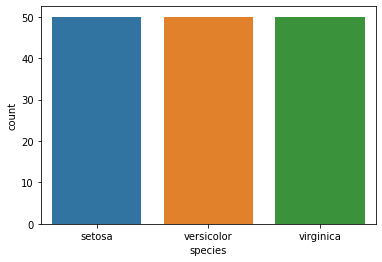

In [100]:
sns.countplot(x='species', data=df);

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

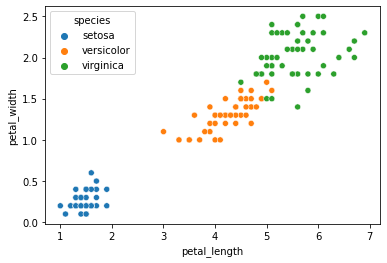

In [105]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

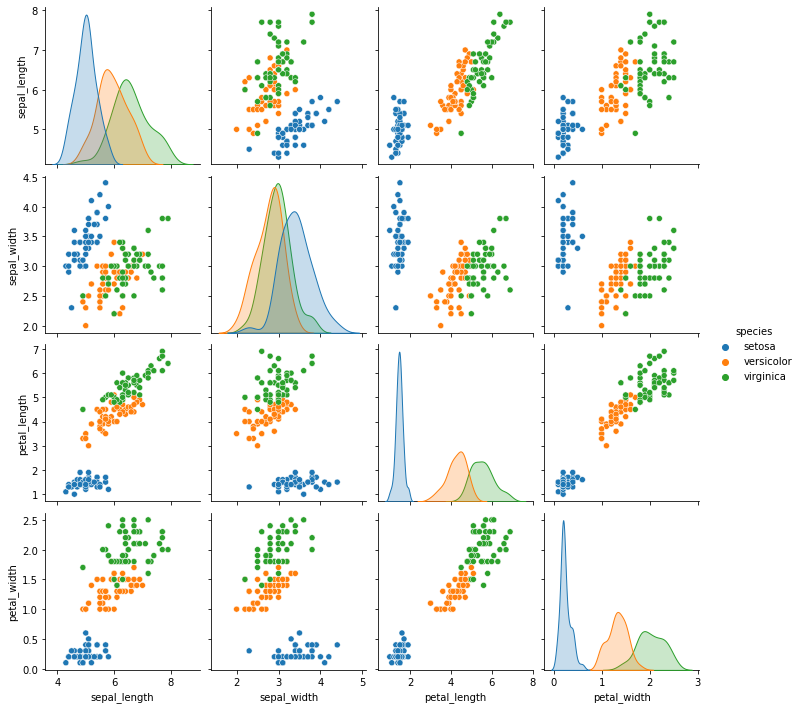

In [106]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

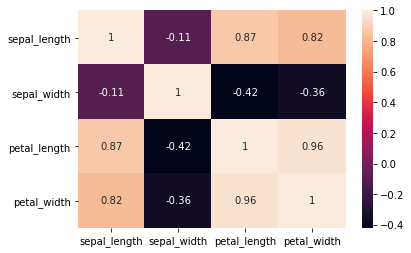

In [107]:
sns.heatmap(df.corr(), annot=True)

In [108]:
X = df.drop('species', axis=1)
y = df['species']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [111]:
log_model = LogisticRegression(solver='saga',
                               multi_class='ovr',
                               max_iter=5000)

In [117]:
penalty = ['l1', 'l2', 'elastic_net']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty,
              'l1_ratio':l1_ratio,
              'C':C}

In [118]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [119]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarn

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitF

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elastic_net']})

In [120]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [121]:
y_pred = grid_model.predict(scaled_X_test)

In [122]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [123]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

C:\Users\Guilherme\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



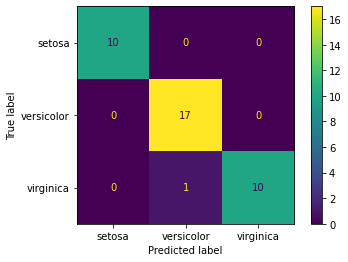

In [125]:
plot_confusion_matrix(grid_model, scaled_X_test,y_test);

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [127]:
from sklearn.metrics import roc_curve, auc

In [128]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

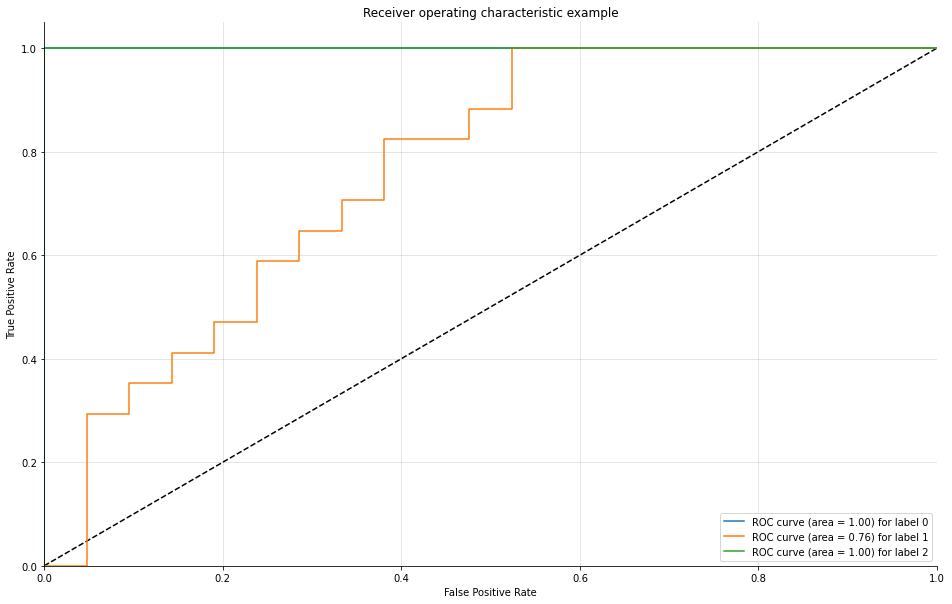

In [129]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))